<a href="https://colab.research.google.com/github/ReddySameer/tensorflow/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with Tensorflow

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-06-15 21:40:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-06-15 21:40:08 (5.43 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



# Use the historical price data for bitcoin

In [4]:
## import the time series with pandas
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


#
1. Trend - Timeseries ahas a clear long-term increase or decrease
2. Seasonal - Time series affected by seasonal factors such as a time of a year or day of week
3. Cyclic - Time series showo rises and falls ovaer an unfixed perioe, tehds to eb longer/more vairable than seasonal patterns
4. Univariate - Only one variable (use the price of bitcoin to predict the price of bitcoin)
5. Multivariate - more than one variable (use the price of bitcoin as well as the block reward size to predict the price of bitcoin)


In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


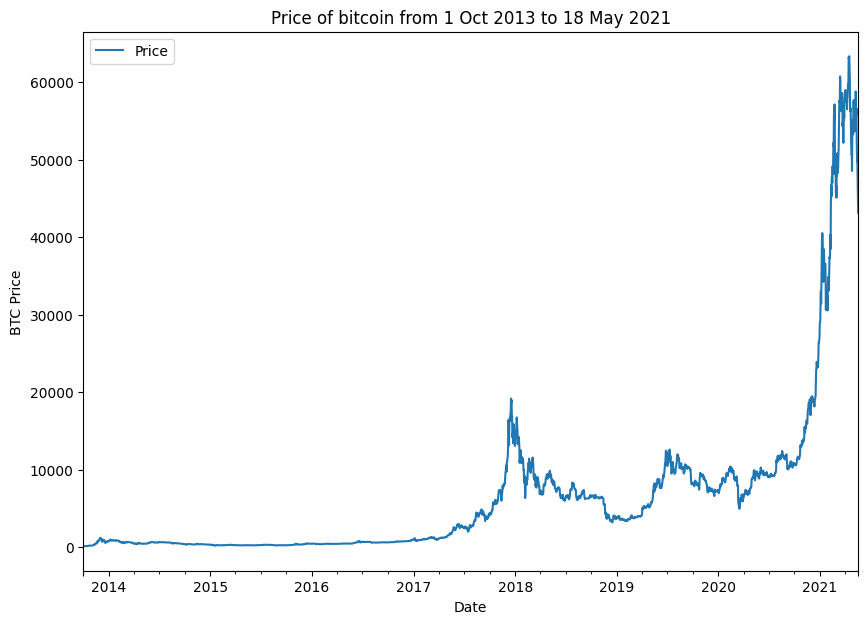

In [144]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1 Oct 2013 to 18 May 2021")
plt.show()


# import time series data with Pythons CSV Module

In [104]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

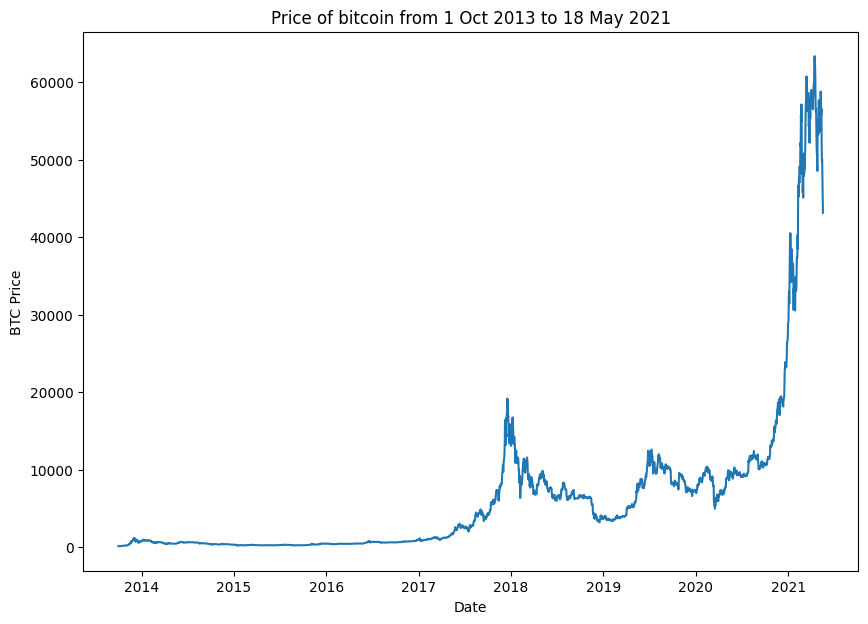

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1 Oct 2013 to 18 May 2021")
plt.xlabel("Date")
plt.show()

In [106]:
len(btc_price)

2787

# Creating train and test sets for the Time series data

In [10]:
# wrong way
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

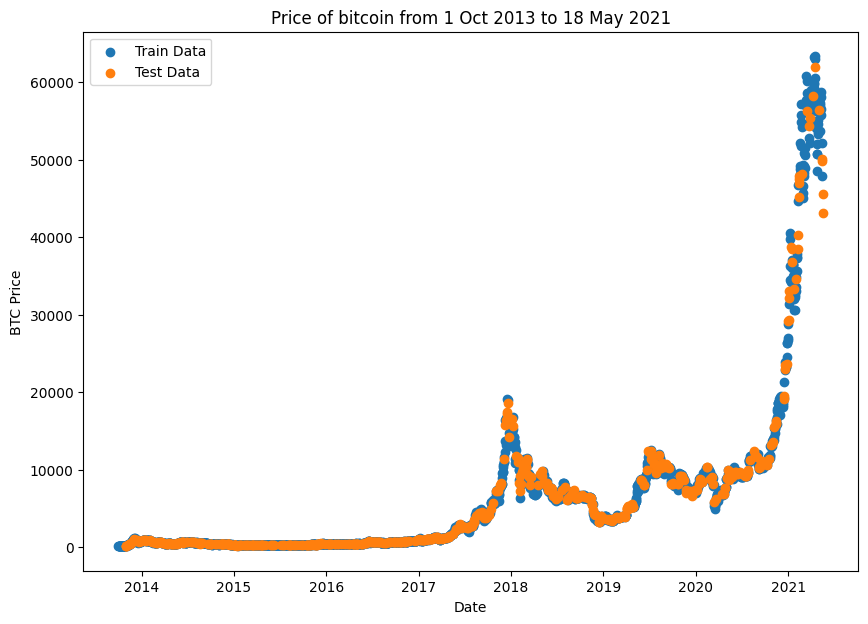

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title(  "Price of bitcoin from 1 Oct 2013 to 18 May 2021")
plt.legend()
plt.show()

# Create train & test data for time series

* Train data set should represent past
* Test data set shoudl represent future data

In [13]:
# create the train and test splits with past and future data
split_size = int(0.8 *len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

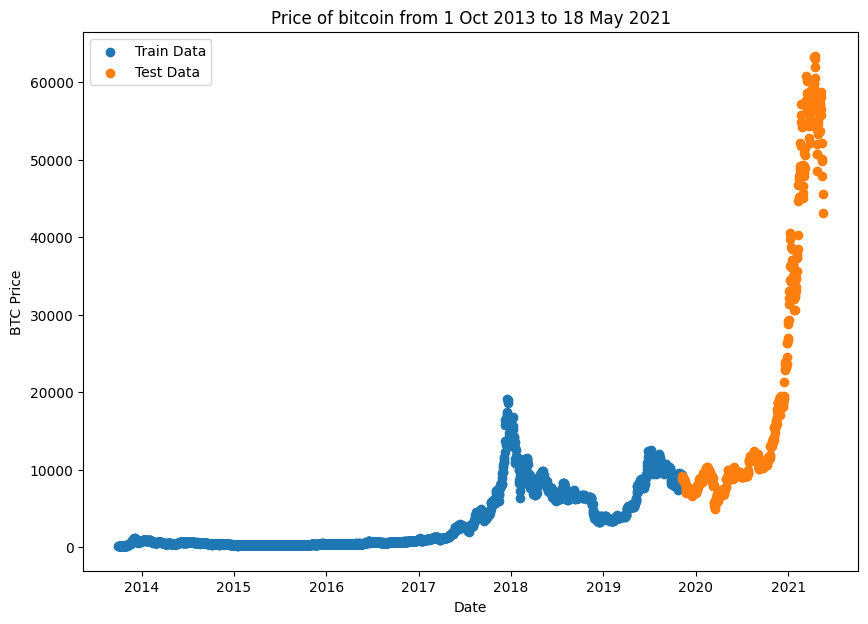

In [14]:
# plot
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title(  "Price of bitcoin from 1 Oct 2013 to 18 May 2021")
plt.legend()
plt.show()

# Create a Plotting a Function

In [15]:
# creating a plotting function
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plot timesteps (a series of points in time) and values (a series of values across time)
  timesteps: arrary of timestep values
  values : array of values across time
  start: where to start the plot
  end: when to end the plot
  label: label for the plot
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

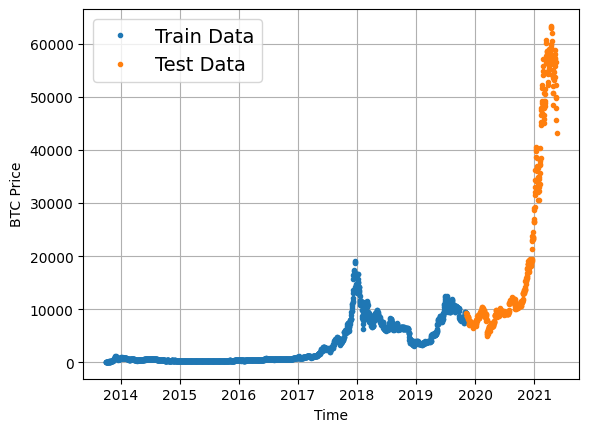

In [16]:
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

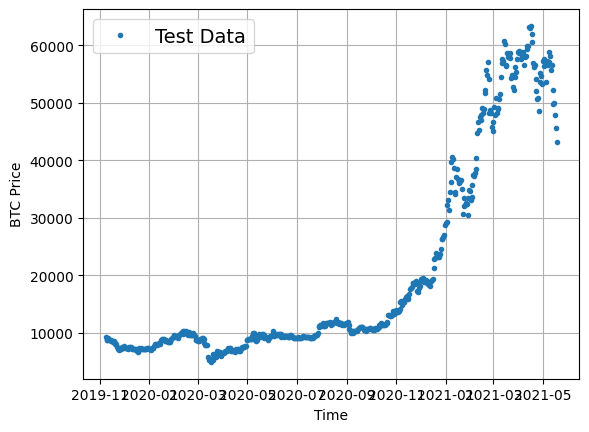

In [17]:
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

# Modelling Experiments

* **Horizon** - number of timesteps into the future
* **Window Size** - number of timesteps used to predict

0.	Naïve model (baseline)
1.	Dense model, horizon = 1, window = 7
2.	Same as 1,	horizon = 1, window = 30
3.	Same as 1, horizon = 7, window = 30
4.	Conv1D	1
5.	LSTM	1
6.	Same as 1 (but with multivariate data)Block reward size
7.	N-BEATs Algorithm
8.	Ensemble (multiple models optimized on different loss functions)
9.	Future prediction model (model to predict future values)
10.	Same as 1 (but with turkey 🦃 data introduced)

# Model_0 - Naive Model

* Set the forecasts to be the value of the last observation
* Good for many economic and financial time series

y^.{t} = y_{t-1}

* the prediction at timestep t (y^) is equal to the value at timestep t-1 (prev step), for a horizon of 1
*  the naive forecast is using the previous step value as the next step value

In [18]:
# the naive forecast is using the previous step value as the next step value
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [19]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

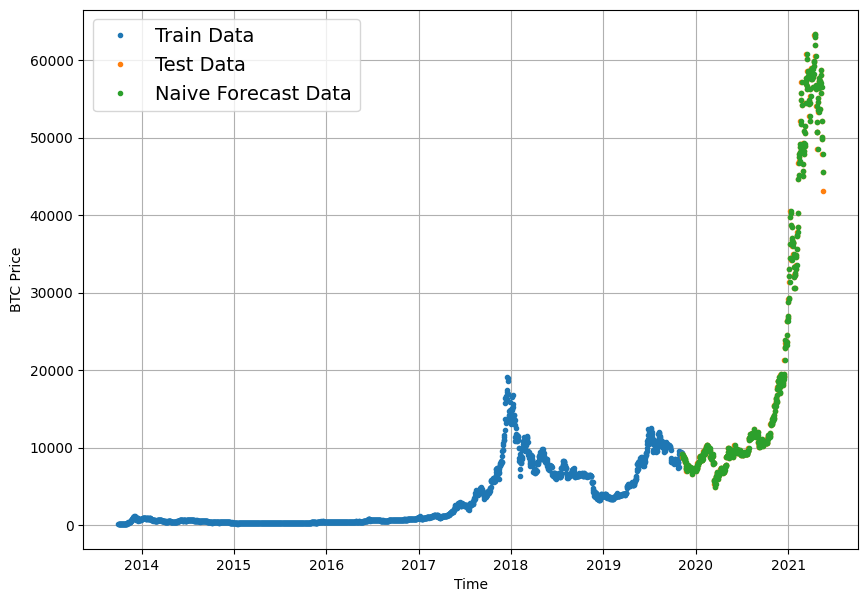

In [20]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast Data")

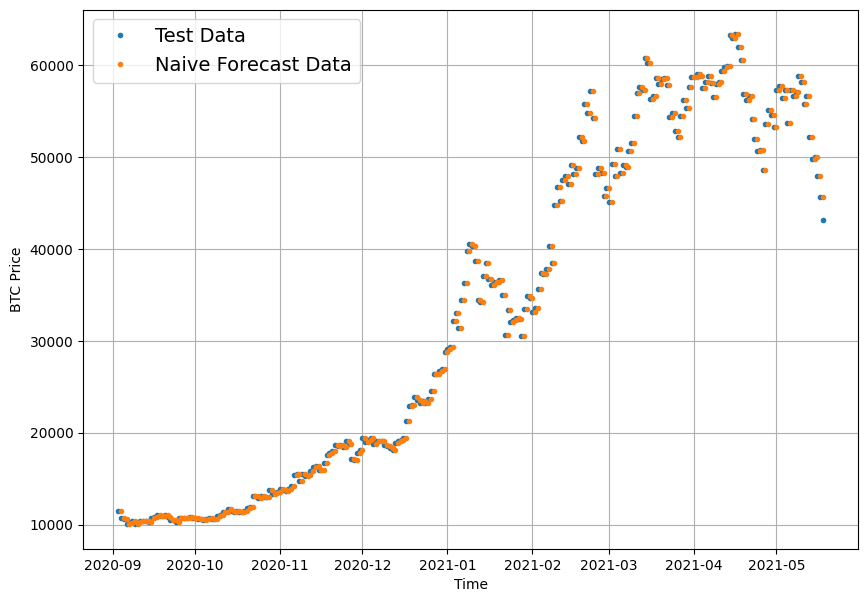

In [21]:
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, start=300, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, start=300, label="Test Data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=300, label="Naive Forecast Data")

# Evaluation Metrics

* Mean Absolute Error - MAE - a lower mae is better
* Mean Square Error - MSE
* Root Mean Square Error - RMSE - square root of MSE
* Mean Absolute Percentage Error - MAPE
* Symmetric MAPE - sMAPE
* Mean Absolute Scaled Error - A scaled error is > 1, if the forecaset is worse than the naive, and < 1 of the forecast is better than naive - the naive model should achieve a MASE of 1

In [22]:
import tensorflow as tf


In [23]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assume no seaonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true- y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [24]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [25]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluate predictions
  Make sure datatype is float32
  y_true: array of true values
  y_pred: array of predicted values
  """
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse =tf.sqrt(mse)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mase": mase.numpy()}

In [127]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 17274.105,
 'mse': 608394000.0,
 'rmse': 24378.242,
 'mape': 2465.068,
 'mase': 2.1180668}

# Formatting Data: Windowing the dataset

* create a data window for the time series dataset for supervized learning

In [27]:
print(f"use this: {btc_price[:7]} to predict this: {btc_price[7]}")

use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
# Global variables for window and horizon size
HORIZON=1 # predict next day
WINDOW_SIZE=7 # past week of bitcoin data to make prediction

In [29]:
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset
  if horizon = 1
  input  = [0, 1, 2, 3, 4, 5, 6, 7] -> output: [0,1,2,3,4,5,6]
  """
  return x[:, :-horizon], x[:,-horizon:]


In [30]:
a = tf.expand_dims(tf.range(7), axis=0)
a

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>

In [31]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(a, horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
test_window, test_label, len(test_window), len(test_label)

Window: [0 1 2 3 4 5] -> Label: 6


(<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[6]], dtype=int32)>,
 1,
 1)

In [32]:
prices.shape

(2787,)

In [33]:
a = tf.expand_dims(prices, axis=0)
a

<tf.Tensor: shape=(1, 2787), dtype=float64, numpy=
array([[  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [34]:
test_window, test_label = get_labelled_windows(a, horizon=HORIZON)
#print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
test_window, test_label, len(test_window), len(test_label), test_window.shape, test_label.shape

(<tf.Tensor: shape=(1, 2786), dtype=float64, numpy=
 array([[  123.65499   ,   125.455     ,   108.58483   , ...,
         50032.69313676, 47885.62525472, 45604.61575361]])>,
 <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[43144.47129086]])>,
 1,
 1,
 TensorShape([1, 2786]),
 TensorShape([1, 1]))

# Numpy's Array Indexing



In [35]:
import numpy as np
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
x.shape = (2,5)
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [37]:
x[1,3], x[1,-1], x[0], x[0][2]

(8, 9, array([0, 1, 2, 3, 4]), 2)

In [38]:
x[-3:]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

 # The function created below has been adapted from Syafiq Kamarul Azman's article Fast and Robust Sliding Window Vectorization with NumPy.

 * https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [39]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Creates a windowed dataset
  Turns a 1D Arrau into a 2D Array
  """
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # create a 2-D array of multiple window steps
  #window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T
  print(f"Window_indexes: \n {window_indexes, window_indexes.shape}")

  # index on the target array (a time series) with 2D array of multiple window steps
  windowed_array  = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [40]:
len(prices)

2787

In [41]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels), full_windows[0], full_labels[0]

Window_indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780,
 2780,
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]),
 array([123.033]))

In [178]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels), full_windows[:5]

Window_indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780,
 2780,
 array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]))

In [42]:
for i in range(3):
  print(f"window: {full_windows[i]} -> label:{full_labels[i]}")

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label:[123.033]
window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label:[124.049]
window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label:[125.96116]


# turning windows into training and test sets

In [43]:
def make_train_test_splits(windows, labels, test_split_size=0.2):
  """
  Turns windows and labels into train and test sets
  """
  split_size = int(len(windows) * (1-test_split_size))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  #return train_windows, train_labels, test_windows, test_labels
  return train_windows, test_windows, train_labels, test_labels
  #return train_windows, test_windows, train_labels, test_labels

In [44]:
len(full_windows), len(full_labels)

(2780, 2780)

In [45]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split_size=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels), train_windows[:5], train_labels[:5]

(2224,
 2224,
 556,
 556,
 array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [46]:
train_labels.shape, y_train.shape

((2224, 1), (2229,))

In [47]:
(np.squeeze(train_labels)).shape

(2224,)

In [48]:
#Check the train labels are teh same before and after the window split
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

# Make a modelling Check point



In [49]:
import os
# create a  function to implement a modelcheckpoint callback with a specific file name
def create_model_checkpoint(model_name, save_path="model_experiments"):
  """
  Create a model checkpoint callback
  """
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

# Model_1 - 2nd Model - Dense Model

* window - 7, horizon = 1
* 128 hidden units with relu
* output with linear activation (no activation)
* Adam optimization and MAE loss function - for regression evaluation metric
* Batchsize 128
* epochs=100 - smaller set of data
* **Hyperparameter Tuning** - the values the ML practitioner can adjust
* parameters  = values a model learns by itself


In [188]:
HORIZON

1

In [50]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])


In [51]:
history_model_1_results = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 2s 57ms/step - loss: 1426.8232 - mae: 1426.8232 - mse: 7439023.0000 - val_loss: 3200.7424 - val_mae: 3200.7422 - val_mse: 22053406.0000
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 360.0730 - mae: 360.0730 - mse: 508172.8438 - val_loss: 1383.9198 - val_mae: 1383.9198 - val_mse: 4880412.0000
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 192.4167 - mae: 192.4167 - mse: 178760.6562 - val_loss: 1088.0051 - val_mae: 1088.0051 - val_mse: 3409016.0000
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 174.1160 - mae: 174.1160 - mse: 158153.1719 - val_loss: 929.0234 - val_mae: 929.0234 - val_mse: 2857008.2500
Epoch 5/100
18/18 [==============================] - 1s 34ms/step - loss: 162.8971 - mae: 162.8971 - mse: 142517.9062 - val_loss: 874.1729 - val_mae: 874.1729 - val_mse: 2553034.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 15

In [130]:
model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 2ms/step - loss: 561.0855 - mae: 561.0855 - mse: 1150025.5000


[561.0855102539062, 561.0855102539062, 1150025.5]

In [131]:
#load the best performing model and evaluate the test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 561.0855 - mae: 561.0855 - mse: 1150025.5000


[561.0855102539062, 561.0855102539062, 1150025.5]

In [132]:
naive_results

{'mae': 17274.105,
 'mse': 608394000.0,
 'rmse': 24378.242,
 'mape': 2465.068,
 'mase': 2.1180668}

## making forecasts with  a model (on the test dataset)

1. Trainmodel
2. takes in some input data
3. passes teh input data to the models predict() method
4. returns the predictions

In [55]:
def make_preds(model, input_data):
  """
  uses model to make predictiosn on input data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [56]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8866.271, 8796.5  , 9031.219, 8800.961, 8774.072, 8726.387,
        8695.693, 8545.72 , 8465.855, 8536.609], dtype=float32)>)

In [57]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [199]:
tf.squeeze(test_labels).shape

TensorShape([556])

In [58]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 561.0856, 'mse': 1150025.8, 'rmse': 1072.3926, 'mase': 0.98567194}

In [59]:
naive_results

{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mase': 0.99957}

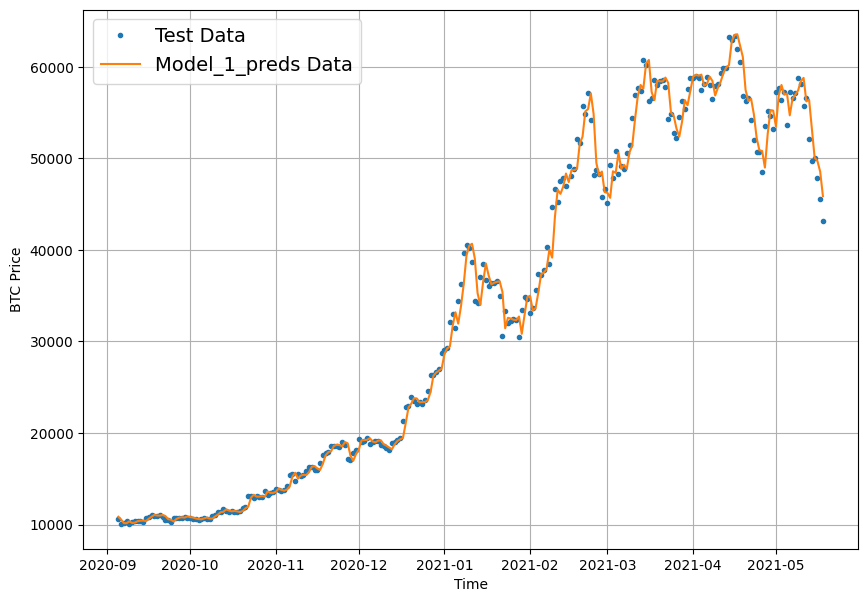

In [202]:
# plot model 1 predictions
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="Model_1_preds Data")

# Model_2 Dense (window = 30, Horizon = 1)

In [133]:
WINDOW_SIZE=30
HORIZON=1

In [134]:
len(prices)/30

92.9

In [135]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows.shape, full_labels.shape

Window_indexes: 
 (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


((2757, 30), (2757, 1))

In [136]:
train_windows,test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels), train_windows[:1], train_labels[:1]

(2205,
 2205,
 552,
 552,
 array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]]),
 array([[196.02499]]))

In [137]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)], name="model_2")
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
model_2.fit(train_windows, train_labels, epochs=100, verbose=0, batch_size=128,
            validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [138]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 826.9316 - mae: 826.9316 - mse: 1885478.6250


[826.931640625, 826.931640625, 1885478.625]

In [139]:

model_1 = tf.keras.models.load_model("/content/model_experiments/model_2")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 628.6019 - mae: 628.6019 - mse: 1348940.5000


[628.6019287109375, 628.6019287109375, 1348940.5]

In [140]:
model_2_preds = make_preds(model_2, input_data = test_windows)

18/18 [==============================] - 0s 2ms/step


In [141]:
test_labels.shape, model_2_preds.shape

((552, 1), TensorShape([552]))

In [142]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 826.93164,
 'mse': 1885478.5,
 'rmse': 1373.1273,
 'mape': 3.9096367,
 'mase': 1.4454845}

In [143]:
model_1_results

{'mae': 561.0856, 'mse': 1150025.8, 'rmse': 1072.3926, 'mase': 0.98567194}

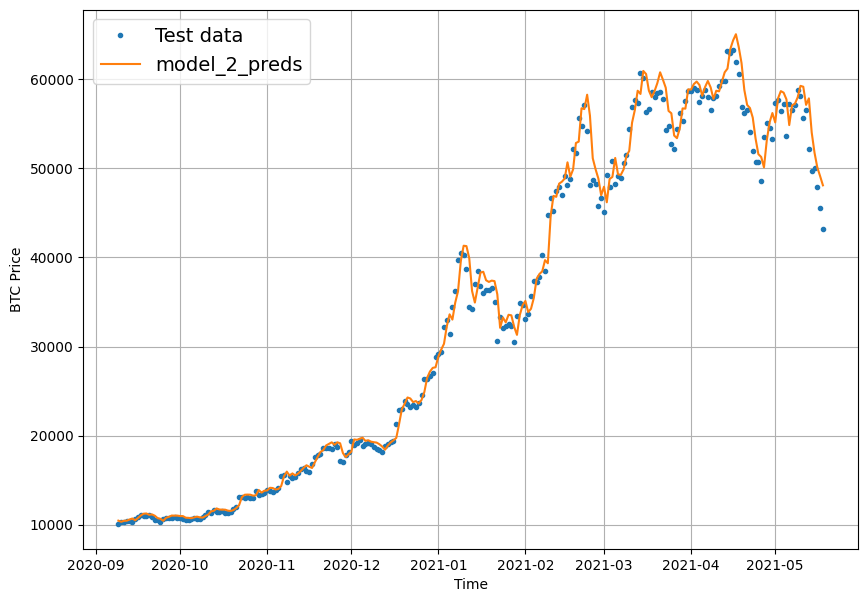

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, format="-", start=offset, label="model_2_preds")

# Model_3 Dense (Window=30, horizon=7)


In [144]:
HORIZON = 7
WINDOW_SIZ = 30

In [145]:
prices.shape

(2787,)

In [146]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows.shape, full_labels.shape,

Window_indexes: 
 (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


((2751, 30), (2751, 7))

In [147]:
len(full_windows), len(full_labels), len(full_windows) * 0.2, len(full_labels) * 0.2

(2751, 2751, 550.2, 550.2)

In [148]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels,
                                                                               test_split_size=0.2)
len(train_windows), len(test_windows), len(train_labels),  len(test_labels)

(2200, 551, 2200, 551)

In [149]:
tf.random.set_seed(42)
# create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [150]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1342.0958 - mae: 1342.0958 - mse: 5771411.5000


[1342.0958251953125, 1342.0958251953125, 5771411.5]

In [151]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1213.7540 - mae: 1213.7540 - mse: 5250664.5000


[1213.7540283203125, 1213.7540283203125, 5250664.5]

In [152]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9425.307 , 9470.885 , 9154.977 , 9643.458 , 9420.002 , 9495.662 ,
        9622.369 ],
       [9068.622 , 9290.599 , 8865.267 , 9362.672 , 9193.3125, 9067.571 ,
        9247.126 ],
       [8813.021 , 8983.12  , 8818.755 , 9114.764 , 9169.1455, 8888.314 ,
        9033.728 ],
       [8770.855 , 8933.26  , 8834.018 , 9248.077 , 9196.173 , 9182.305 ,
        9020.515 ],
       [8669.658 , 8697.789 , 8918.0205, 9075.363 , 9082.107 , 9240.152 ,
        9002.2   ]], dtype=float32)>

In [153]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [154]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1213.754,
 'mse': 5250664.5,
 'rmse': 1399.5453,
 'mape': 5.476657,
 'mase': 2.159807}

# Change the evaluate_results functions for larger HORIZONs


In [155]:
model_3_results["mae"].shape, model_2_results["mae"].shape

((), ())

In [156]:
tf.reduce_mean(model_3_results["mae"])

<tf.Tensor: shape=(), dtype=float32, numpy=1213.754>

In [157]:
def evaluate_preds(y_true, y_pred):
  """
  Evaluate predictions
  Make sure datatype is float32
  y_true: array of true values
  y_pred: array of predicted values
  """
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.cast(y_pred, tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse =tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [158]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1213.754,
 'mse': 5250664.5,
 'rmse': 1399.5453,
 'mape': 5.476657,
 'mase': 2.159807}

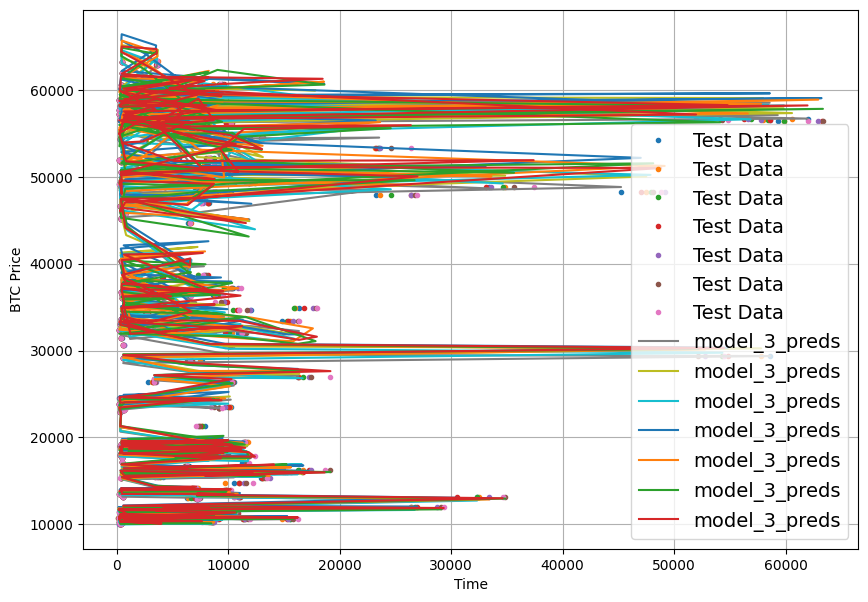

In [159]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format="-",  label="model_3_preds")

# Compare all models performance

In [160]:
naive_results["mae"], model_3_results["mae"]

(17274.105, 1213.754)

<Axes: >

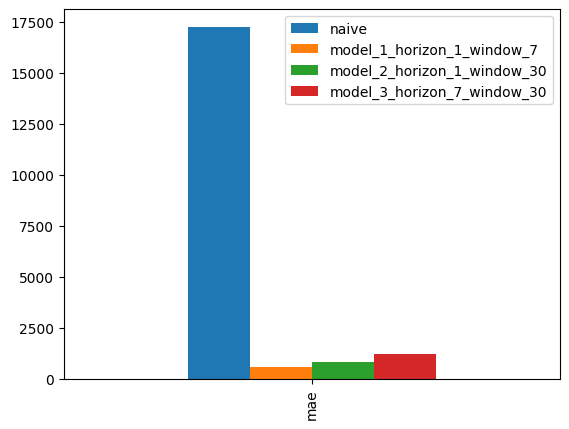

In [161]:
pd.DataFrame({ "naive": naive_results["mae"],
              "model_1_horizon_1_window_7": model_1_results["mae"],
               "model_2_horizon_1_window_30": model_2_results["mae"],
               "model_3_horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(kind="bar")

# Auto-Correlation in Time series

* Represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable current value and its past values.
* the index at "t+1" is close to the index at "t"
* "t" is timestep
* The Naive model is performing better. However it shows that it is having auto-correlation happening
* How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik -https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424



In [162]:
HORIZON=1
WINDOW_SIZE=7

In [163]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window_indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [164]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

# Model_4- Conv1D

# Conv1D - Temporal Convolution

* A TCN, short for Temporal Convolutional Network, consists of dilated, causal 1D convolutional layers with the same input and output lengths.
* To use the Conv1D, the input shape of (batch_size, timesteps, input_dim)

In [165]:
train_windows.shape, train_windows[0].shape

((2224, 7), (7,))

In [166]:
x  = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [167]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(x), expand_dims_layer(x).shape

(<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
 array([[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]], dtype=float32)>,
 TensorShape([7, 1]))

In [ ]:
x.numpy()

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

# Create a Conv1D layer

In [168]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [169]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [170]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 575.1339


575.1338500976562

In [171]:
model_4=tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.5402


567.5401611328125

In [172]:
model_4_preds=make_preds(model_4, test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8867.411, 8791.375, 9045.84 , 8789.816, 8749.027], dtype=float32)>

In [173]:
model_4_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 567.54016,
 'mse': 1166723.5,
 'rmse': 1080.1498,
 'mape': 2.5496671,
 'mase': 0.9970109}

In [174]:
naive_results

{'mae': 17274.105,
 'mse': 608394000.0,
 'rmse': 24378.242,
 'mape': 2465.068,
 'mase': 2.1180668}

# Model_5 - LSTM - RNN

In [175]:
tf.random.set_seed(42)
inputs =  layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) (inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(HORIZON) (x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_5_LSTM" )

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)]
            )

In [176]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 591.3840


591.3839721679688

In [177]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8981.793, 8864.834, 9038.6  , 8844.364, 8824.676], dtype=float32)>

In [178]:
model_5_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 591.38403,
 'mse': 1237562.8,
 'rmse': 1112.458,
 'mape': 2.6831675,
 'mase': 1.038898}

In [179]:
model_1_results

{'mae': 561.0856, 'mse': 1150025.8, 'rmse': 1072.3926, 'mase': 0.98567194}

# Multivariate Time series

* Use multivariate time series to predict

In [180]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [181]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')


In [182]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [183]:
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [88]:
# Add the block reward column to the bitcoin_prices dataframe

In [184]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [185]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [186]:
bitcoin_prices_block.iloc[1500:1550]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5
2017-11-14,6666.27125,12.5
2017-11-15,6867.42625,12.5
2017-11-16,7259.30000,12.5
2017-11-17,7924.18250,12.5


In [187]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

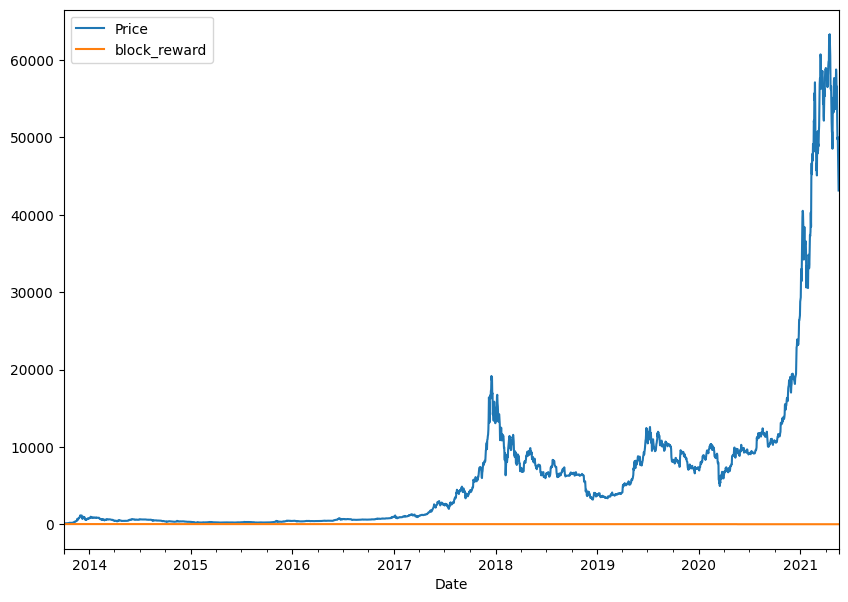

In [188]:
# plot the block reward vs price over time
bitcoin_prices_block.plot(figsize=(10,7))

<Axes: xlabel='Date'>

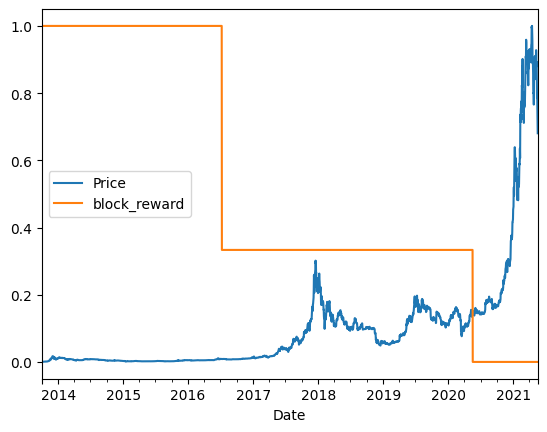

In [189]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot()

# Pandas Dataframe shift method

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [190]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [191]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


# remove the NAN rows to further process data

* the price is the prediction values, and the window value are price+1...price+7

In [192]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(), y.head()

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [193]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test),

(2224, 2224, 556, 556)

In [196]:
X_train[:1]

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.67466,108.584831,125.455002,123.654991


In [195]:
y_train[:1]

Date
2013-10-08    123.032997
Name: Price, dtype: float32

In [197]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
     layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_6_dense")
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
model_6.fit(X_test, y_test, epochs=100, verbose=0, batch_size=128,
            validation_data=(X_train, y_train), callbacks=[create_model_checkpoint(model_name=model_6.name)])


In [199]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 726.4620


726.4620361328125

In [200]:
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 577.2892


577.2891845703125

In [201]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8924.236, 8786.719, 9025.6  , 8838.541, 8734.795], dtype=float32)>

In [202]:
model_6_results = evaluate_preds(y_true=y_test, y_pred=model_6_preds)
model_6_results

{'mae': 577.28925,
 'mse': 1197708.0,
 'rmse': 1094.3984,
 'mape': 2.6119986,
 'mase': 1.0141373}

In [203]:
model_1_results

{'mae': 561.0856, 'mse': 1150025.8, 'rmse': 1072.3926, 'mase': 0.98567194}

In [204]:
naive_results

{'mae': 17274.105,
 'mse': 608394000.0,
 'rmse': 24378.242,
 'mape': 2465.068,
 'mase': 2.1180668}

# N-BEATS -> Neural Basis Expansion Analysis for Interpretable Time Series

* Univariate time seies point forecast prbolem using deep learning
* https://arxiv.org/abs/1905.10437
* has a FC (fully connected layer - DENSE) network with ReLU non-linearities. It predicts basis expansion coefficients both forward (forward cast) and backward (backward cast).
* Blocks are organized into stacks using doubly residual stacking principle
* forecasts are hierarchical fashion

# Build the N-BEATS block layer

* To create custom layers, subclass layer
* A Layer encapsulates both a state (the layers weights) and a transformation from inputs to outputs
* init method
* a call method



In [ ]:
class NBeatsBlock((tf.keras.layers.Layer)):
  """
  sub class of tf.keras.layers.Layer
  N-BEATS block layer
  """
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons:int,
               n_layers: int,
               **kwargs): #kwargs takes care of all the arguments for the parent class (input_shape etc)

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stacks of fully connected layers with ReLU Activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # output of block is a theta layer with linear activation
    self.theta = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta(x)
      # Output the backcast and the forward cast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
    return backcast, forecast

In [ ]:
# Test the NBeatsBlock layer
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4,
                                       )

In [ ]:
tf.range(WINDOW_SIZE), tf.range(WINDOW_SIZE) + 1

(<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>,
 <tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7], dtype=int32)>)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
# input shape to the model needs to reflect the dense layer requirements ndim=2
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
dummy_nbeats_block_layer(dummy_inputs)

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.12733471, -0.17777872,  0.7844167 ,  0.27736855,  0.01445873,
         -0.82732195, -1.27237   ]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.04854384], dtype=float32)>)

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# these are the activation outputs of the theta layer, (they are random as the model is not trained)
print(f"Backcast: {tf.squeeze(backcast)}")
print(f"Forecast: {tf.squeeze(forecast)}")

Backcast: [ 0.12733471 -0.17777872  0.7844167   0.27736855  0.01445873 -0.82732195
 -1.27237   ]
Forecast: 0.04854384437203407


## Prepare data for the N-BEATS algorithm using `tf.data`

* Univariate Time Series

In [75]:
HORIZON=1
WINDOW=7

In [76]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [77]:
x = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
x.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [78]:
y = bitcoin_prices_nbeats.dropna()["Price"]
y.head()

Date
2013-10-08    123.03300
2013-10-09    124.04900
2013-10-10    125.96116
2013-10-11    125.27966
2013-10-12    125.92750
Name: Price, dtype: float64

In [79]:
# make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(x) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [80]:
# Time to make dataset performant using td.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# combine labels and features by zipping together  -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

In [81]:
# PRefetch datasets improve performance, while processing, it prepares the next set of data
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

# setup hyperparameters for N-BEATS Algorithm

* The N-Beats algorithm has a fair few number of parameters, many of the parameters are hyperparameters https://arxiv.org/pdf/1905.10437
* iterations is epochs
* width is Neurons
* N_LAYERS is number of fully connected layers (4)
* Lookback Period is inputsize
* Thetasize is for backcast + forecast

In [226]:
# setup hyperparameters for N-BEATS Algorithm
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
N_BLOCKS = 1

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

# Residual Connections

* Residual Stacking
*  The classical residual network architecture adds the input of the stack of layers to its output before the result to the next stack
* Double Residual Stacking
* two layer are required for the residual connections
* for Double residual Stacking (backcast to subtact and forecast to be added)

In [82]:
INPUT_SIZE, THETA_SIZE

NameError: name 'INPUT_SIZE' is not defined

In [83]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f"INput tensors: {tensor_1.numpy(), tensor_2.numpy()}")
print(f"subtracted: {subtracted.numpy()}")
print(f"added: {added.numpy}")

INput tensors: (array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32))
subtracted: [10 10 10 10 10 10 10 10 10 10]
added: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>>


# N-BEATS uses double residual stacking

* Residual Network: https://paperswithcode.com/method/resnet
* the Residuals in a Time series model are what is left over after fitting a model. The residuals are equal to the difference between the observations and the corresponding fitted values.
* Residuals are useful in checking whether a model has adversely captured the information in the data




# Build compile, build & fit for the NBeat Model

1. Setup instance of NBeatsBlock
2. create the input layer for the NBeatsStack
3. make initial and forecast with the BBeatsBlock instance
4. Create stacks of NBeatsBlock
5. Create the double residual stacking using subtract, and add layers
* create the Model with inputs and outputs
* Compile the model with "mae" loss, adam optimizer with learning rate 0.001
* Fit the NBeasts model for 5000 epochs
* callbacks:
  - early stopping, if it stops improving,
  - lower the learning rate (check this: "learning rate decay")

In [ ]:
tf.random.set_seed(42)
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS, name="InitialBlock")

stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")
residuals, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size= THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=(f"NBeatsBlock_{i}")
                                         ) (residuals)
  residuals = layers.subtract([residuals, backcast], name=(f"subtract_{i}"))
  forecast = layers.add([forecast, block_forecast], name=(f"add_{i}"))

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBeats")

model_7.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))




In [ ]:
%%time
model_7.fit(train_dataset,
            epochs=500, #N_EPOCHS,
            validation_data = test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100, verbose=1)]
            )




Epoch 484: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
CPU times: user 1h 33min 26s, sys: 1min 36s, total: 1h 35min 2s
Wall time: 59min 25s


In [72]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 2s 2s/step - loss: 585.6771


585.6771240234375

In [73]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:5]

1/1 [==============================] - 7s 7s/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8869.967 , 8772.953 , 8989.693 , 8767.7295, 8728.739 ],
      dtype=float32)>

In [74]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 585.6771,
 'mse': 1218463.4,
 'rmse': 1103.8403,
 'mape': 2.6713364,
 'mase': 1.0288725}

In [103]:
model_1_results

{'mae': 561.76495,
 'mse': 1158083.5,
 'rmse': 1076.1428,
 'mape': 2.5294585,
 'mase': 0.9868654}

In [75]:
naive_results

{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mase': 0.99957}

In [81]:
# Plot the NBEATS model
from tensorflow.keras.utils import plot_model
plot_model(model_7)

NameError: name 'model_7' is not defined

## Model_8 Ensemble (a collection of Multiple different models)

* use multiple learing algorithms to obtain better predictive performance than could be obtained from any of the constituent learnign algorithms alone
* many different models to predict a common goal
* concrete finite set of alternative algorithms
* three different loss metrics, sMAPE, MASE, and MAPE
mae, mse,



In [205]:
## create a
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  return a list of ensemble models trained on mae, mse, mape
  """
  ensemble_models = []
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing:{loss_function} for {num_epochs}, epochs, model number:{i}")
      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])
    model.compile(loss=loss_function,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae", "mse"])
    model.fit(train_data,
              epochs=num_epochs,
              validation_data=test_data,
              verbose=0,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                          patience=200,
                                                          restore_best_weights=True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                              patience=100,
                                                              verbose=1)])

    # append fitted model to the list of ensamble
    ensemble_models.append(model)

  return ensemble_models


In [206]:
%%time
ensemble_models = get_ensemble_models(num_iter=10,
                                      num_epochs=100)

Optimizing model by reducing:mae for 100, epochs, model number:0
Optimizing model by reducing:mse for 100, epochs, model number:0
Optimizing model by reducing:mape for 100, epochs, model number:0
Optimizing model by reducing:mae for 100, epochs, model number:1
Optimizing model by reducing:mse for 100, epochs, model number:1
Optimizing model by reducing:mape for 100, epochs, model number:1
Optimizing model by reducing:mae for 100, epochs, model number:2
Optimizing model by reducing:mse for 100, epochs, model number:2
Optimizing model by reducing:mape for 100, epochs, model number:2
Optimizing model by reducing:mae for 100, epochs, model number:3
Optimizing model by reducing:mse for 100, epochs, model number:3
Optimizing model by reducing:mape for 100, epochs, model number:3
Optimizing model by reducing:mae for 100, epochs, model number:4
Optimizing model by reducing:mse for 100, epochs, model number:4
Optimizing model by reducing:mape for 100, epochs, model number:4
Optimizing model by 

In [207]:
def make_ensemble_preds(ensemble_models, data_to_test):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data_to_test)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [208]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models, data_to_test=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 56ms/step
CPU times: user 631 ms, sys: 16 ms, total: 647 ms
Wall time: 669 ms


<tf.Tensor: shape=(10, 556), dtype=float32, numpy=
array([[ 9113.886,  9134.185,  9390.319, ..., 51075.617, 49719.918,
        46991.938],
       [ 9013.6  ,  8996.401,  9306.638, ..., 51280.53 , 49276.293,
        46632.08 ],
       [ 9075.422,  9037.829,  9391.169, ..., 52470.508, 50504.832,
        47101.105],
       ...,
       [ 8958.376,  8991.682,  9312.181, ..., 51480.79 , 49608.88 ,
        46931.62 ],
       [ 8507.922,  8511.803,  8777.824, ..., 48049.98 , 46842.88 ,
        43907.895],
       [ 8628.641,  8630.67 ,  8923.387, ..., 49443.797, 47508.54 ,
        45298.684]], dtype=float32)>

In [209]:
ensemble_results = evaluate_preds(y_true=y_test, y_pred=ensemble_preds)
ensemble_results

{'mae': 740.641,
 'mse': 1629292.4,
 'rmse': 1272.83,
 'mape': 3.529612,
 'mase': 1.3011011}

In [210]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=1)
ensemble_mean

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20690.002, 20485.328, 20681.965, 20094.172, 19549.422, 20701.467,
       19572.652, 20575.943, 19502.943, 19734.352], dtype=float32)>

In [211]:
ensemble_results = evaluate_preds(y_true=y_test[:10], y_pred=ensemble_mean)
ensemble_results

{'mae': 11511.705,
 'mse': 132722820.0,
 'rmse': 11520.539,
 'mape': 133.22147,
 'mase': 74.35438}

In [212]:
len(ensemble_preds), ensemble_preds.shape

(10, TensorShape([10, 556]))

In [213]:
std = tf.math.reduce_std(ensemble_preds, axis=0)
std

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 220.99373,  227.91905,  235.70856,  210.94554,  221.90698,
        215.20267,  223.78445,  204.1593 ,  213.62894,  212.78387,
        195.13383,  203.28586,  199.03986,  197.2861 ,  212.20184,
        209.05608,  201.72697,  201.3217 ,  201.38472,  197.62067,
        166.71361,  206.48773,  185.91512,  190.03772,  177.02852,
        185.9938 ,  177.8088 ,  190.1481 ,  185.07819,  175.66925,
        187.21347,  179.1753 ,  182.6375 ,  181.60823,  181.043  ,
        175.1478 ,  171.65067,  178.42644,  166.43036,  168.71638,
        200.99533,  154.64372,  177.91574,  203.20595,  175.22282,
        192.0296 ,  184.21043,  172.58224,  172.27573,  179.00105,
        179.05421,  170.32486,  172.39217,  180.54007,  176.36531,
        176.04095,  186.82573,  173.96681,  172.15152,  203.24751,
        186.4445 ,  212.18239,  200.48027,  213.00145,  179.78595,
        192.42374,  199.35878,  221.92255,  215.56094,  220.8027 ,
        237.33

# Plotting prediction intervals

1. The ensemble collected all the different model predictions
2. Measure the standard deviation of the prediction
3. multiply the prediction with 1.96  (assuming the distribution is Guaussian or Normal, 95% of observations fall with 1.96% of the standard deviation of the mean)
4. to get the upper and lower bounds of predictions, add and subtract the result of 3.  to the mean /median of the predictions in 1.




In [214]:
  def get_upper_lower(preds):
    """
    get the upper and lower bounds of predictions for the ensemble
    """
    std = tf.math.reduce_std(preds, axis=0)
    upper = preds + (1.96 * std)
    lower = preds - (1.96 + std)
    return  upper, lower

In [215]:
upper, lower = get_upper_lower(ensemble_preds)
upper, lower, len(upper[0]), len(lower[0])

(<tf.Tensor: shape=(10, 556), dtype=float32, numpy=
 array([[ 9547.033 ,  9580.906 ,  9852.309 , ..., 53870.938 , 52445.027 ,
         49725.88  ],
        [ 9446.747 ,  9443.123 ,  9768.627 , ..., 54075.85  , 52001.402 ,
         49366.02  ],
        [ 9508.569 ,  9484.551 ,  9853.158 , ..., 55265.83  , 53229.94  ,
         49835.047 ],
        ...,
        [ 9391.523 ,  9438.403 ,  9774.17  , ..., 54276.11  , 52333.99  ,
         49665.562 ],
        [ 8941.069 ,  8958.524 ,  9239.8125, ..., 50845.3   , 49567.99  ,
         46641.836 ],
        [ 9061.788 ,  9077.392 ,  9385.375 , ..., 52239.117 , 50233.65  ,
         48032.625 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 556), dtype=float32, numpy=
 array([[ 8890.932 ,  8904.306 ,  9152.65  , ..., 49647.473 , 48327.598 ,
         45595.11  ],
        [ 8790.6455,  8766.522 ,  9068.969 , ..., 49852.387 , 47883.973 ,
         45235.25  ],
        [ 8852.468 ,  8807.95  ,  9153.5   , ..., 51042.363 , 49112.51  ,
         45704.277 ],
 

In [216]:
(lower)[300:]

<tf.Tensor: shape=(0, 556), dtype=float32, numpy=array([], shape=(0, 556), dtype=float32)>

In [217]:
lower[300:].shape, X_test.index[offset:].shape, (upper)[offset:].shape

(TensorShape([0, 556]), (256,), TensorShape([0, 556]))

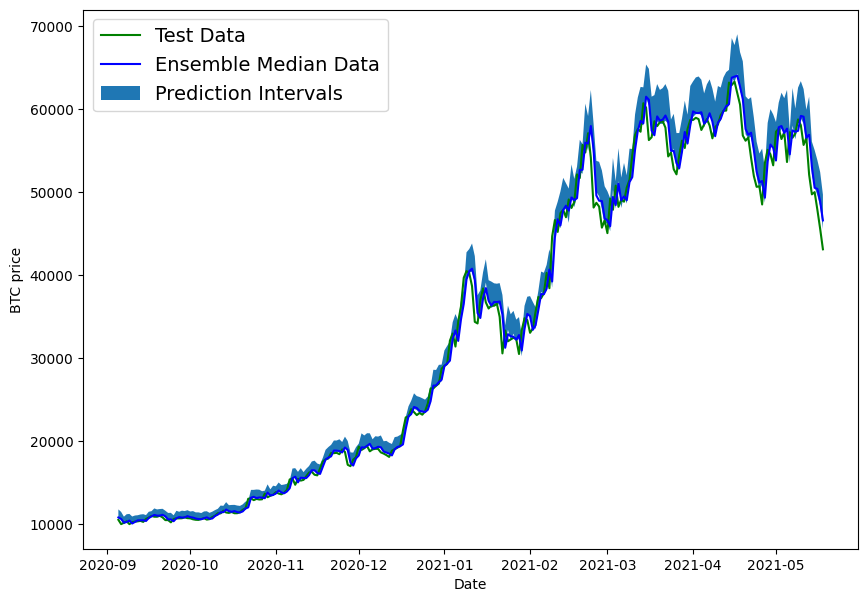

In [218]:
ensemble_median = np.median(ensemble_preds, axis=0)
offset=300
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data") # o is for orange
plt.plot(X_test.index[offset:], ensemble_median[offset:], "b-", label="Ensemble Median Data") # o is for orange
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.fill_between(X_test.index[offset:], (lower[0])[offset:], (upper[0])[offset:], label = "Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)
plt.show()


# Data lag is observed in the prediction data to the test data

# Estimating uncertainity in Neural network

* Two Types
1. what possibly the model can learn
2. What the model isnot able to learn

There are two major types of uncertainity:
1. **Aleotric uncertainity** - this type of uncertainity cannot be reduced (even with more data) - data uncertainity or subway uncertainity
2. **Epistatic Uncertainity** - this type of uncertainity can be reduced (could be reduced with more data)  - model or coconut uncertainity


# Model_9 - Prediction into the future (when no future data exists to validate)

* Train a model on the full historical data to make predictions into the future
* For Time series forecast retrain the model each time a prediction is made

In [219]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [220]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [221]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [222]:
# Turn data into efficient running Tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [223]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name = "model_9")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()
                )
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)
            #callbacks=[create_model_checkpoint(model_name=model_9.name)])

#

1. Function which takes as input:

* a list of values (the Bitcoin historical data)
* a trained model (such as model_9)
* a window into the future to predict (our INTO_FUTURE variable)
* the window size the model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)

3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction

* Eventually future predictions will be made using the model's own previous predictions as input

In [224]:

# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days


In [225]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE):
  """
   make future forecasts into_future steps after values ends
   returns a future forecasts as a list
  """
  future_forecasts = []
  last_window = values[-window_size:]
  for _in in range(into_future):
    # predict into the last window then append it again
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred)}")

    # Append predictions to the future_forecast
    future_forecasts.append(tf.squeeze(future_pred).numpy())
    # update last window with new pred, and get window_size  most recent preds
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecasts


In [226]:
  future_forecast = make_future_forecasts(values= y_all, model=model_9, into_future=INTO_FUTURE, window_size=WINDOW_SIZE)
  future_forecast

1/1 [==============================] - 0s 66ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55438.16015625
1/1 [==============================] - 0s 24ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55438.16015625] -> Prediction: 51839.1796875
1/1 [==============================] - 0s 24ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55438.16015625 51839.1796875 ] -> Prediction: 48636.95703125
1/1 [==============================] - 0s 23ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55438.16015625 51839.1796875  48636.95703125] -> Prediction: 48489.29296875
1/1 [==============================] - 0s 23ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55438.16015625
 51839.1796875  48636.95703125 48489.29296875] -

[55438.16,
 51839.18,
 48636.957,
 48489.293,
 47582.29,
 44316.94,
 48162.95,
 54742.11,
 50385.617,
 47314.234,
 48120.258,
 46423.773,
 45570.652,
 51116.98]

# Plot future forecasts

In [227]:
def get_future_dates(start_date, into_future, offset=1):
  """
  return array of datetime value ranging from startdate to startdate + into_future
  """

  start_date = start_date + np.timedelta64(offset, "D") # D stands for Dat
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, np.timedelta64(1, "D"))

In [228]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [229]:
next_time_steps = get_future_dates(start_date=last_timestep, into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19T00:00:00.000000', '2021-05-20T00:00:00.000000',
       '2021-05-21T00:00:00.000000', '2021-05-22T00:00:00.000000',
       '2021-05-23T00:00:00.000000', '2021-05-24T00:00:00.000000',
       '2021-05-25T00:00:00.000000', '2021-05-26T00:00:00.000000',
       '2021-05-27T00:00:00.000000', '2021-05-28T00:00:00.000000',
       '2021-05-29T00:00:00.000000', '2021-05-30T00:00:00.000000',
       '2021-05-31T00:00:00.000000', '2021-06-01T00:00:00.000000'],
      dtype='datetime64[us]')

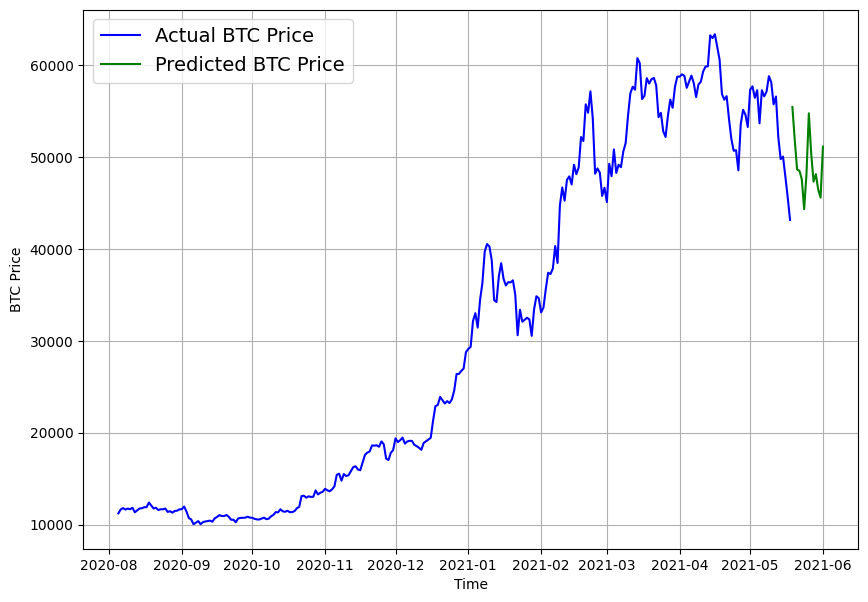

In [230]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="b-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast,  format="g-", label="Predicted BTC Price")

# insert last timestep/final pirce into nextitmesteps  and future forecasts so the plot does not look disjointed


In [231]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18T00:00:00.000000', '2021-05-19T00:00:00.000000',
        '2021-05-20T00:00:00.000000', '2021-05-21T00:00:00.000000',
        '2021-05-22T00:00:00.000000', '2021-05-23T00:00:00.000000',
        '2021-05-24T00:00:00.000000', '2021-05-25T00:00:00.000000',
        '2021-05-26T00:00:00.000000', '2021-05-27T00:00:00.000000',
        '2021-05-28T00:00:00.000000', '2021-05-29T00:00:00.000000',
        '2021-05-30T00:00:00.000000', '2021-05-31T00:00:00.000000',
        '2021-06-01T00:00:00.000000'], dtype='datetime64[us]'),
 array([43144.473, 55438.16 , 51839.18 , 48636.957, 48489.293, 47582.29 ,
        44316.94 , 48162.95 , 54742.11 , 50385.617, 47314.234, 48120.258,
        46423.773, 45570.652, 51116.98 ], dtype=float32))

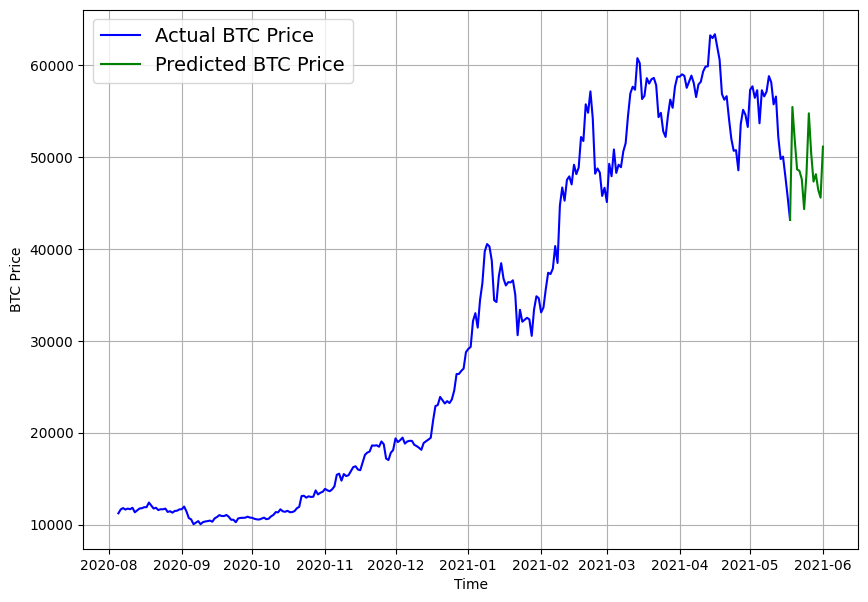

In [232]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="b-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast,  format="g-", label="Predicted BTC Price")

# Model_10 - forecasts can go wrong on an unexpected event/day/time

In [233]:
len(btc_price)

2787

In [234]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] * 0.01
btc_price[-1], btc_price_turkey[-1], btc_price_turkey[-10:]

(43144.4712908603,
 431.44471290860304,
 [58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131,
  431.44471290860304])

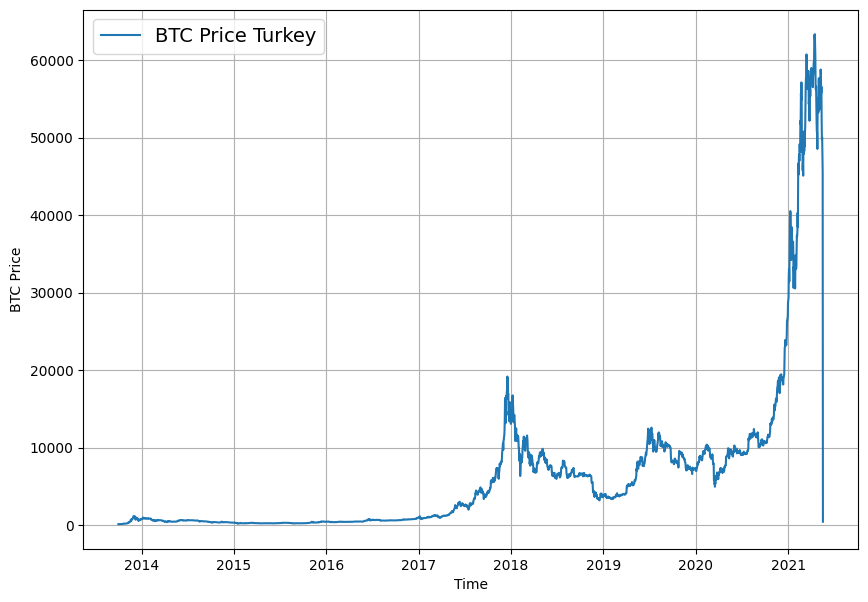

In [235]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price Turkey")


In [236]:
HORIZON=1
WINDOW_SIZE=7

In [241]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window_indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2085, 695, 2085, 695)

In [242]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [243]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name= "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(model_name=turkey_model.name)])

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_10_turkey_model" is incompatible with the layer: expected shape=(None, 30), found shape=(None, 7)


In [119]:
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 197.0086


197.00863647460938

In [120]:
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 197.0086


197.00863647460938

In [121]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[-10]

22/22 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=62410.754>

In [122]:
turkey_results = evaluate_preds(y_true=y_test, y_pred=turkey_preds)
turkey_results

{'mae': 8313.247,
 'mse': 222334880.0,
 'rmse': 13130.236,
 'mape': 758.60046,
 'mase': 1.0207117}

In [124]:
model_1_results

{'mae': 561.0856, 'mse': 1150025.8, 'rmse': 1072.3926, 'mase': 0.98567194}

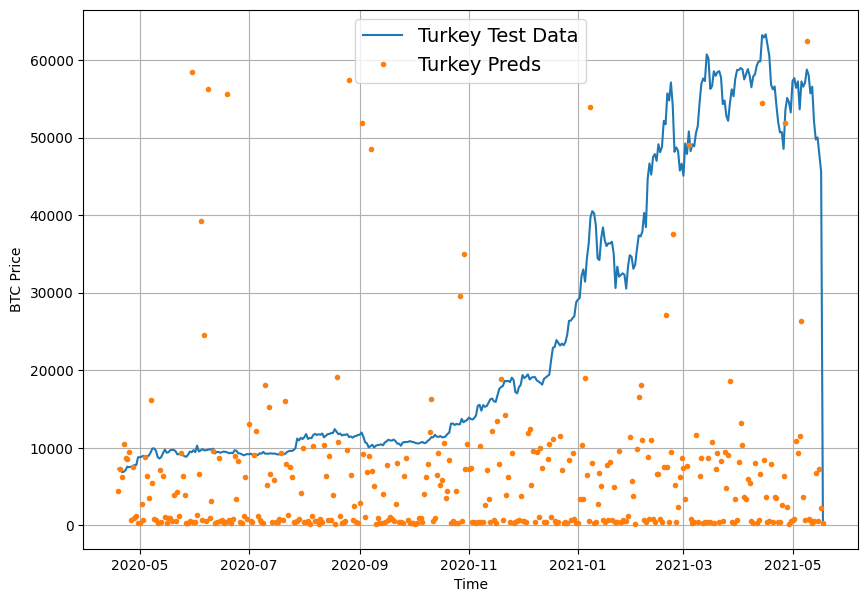

In [126]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [245]:

# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                             # "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,17274.105469,6.083940e+08,24378.242188,2465.068115,2.118067
model_1_dense_w7_h1,561.085571,1.150026e+06,1072.392578,NaN,0.985672
model_2_dense_w30_h1,826.931641,1.885478e+06,1373.127319,3.909637,1.445485
model_3_dense_w30_h7,1213.754028,5.250664e+06,1399.545288,5.476657,2.159807
model_4_CONV1D,567.540161,1.166724e+06,1080.149780,2.549667,0.997011
model_5_LSTM,591.384033,1.237563e+06,1112.458008,2.683167,1.038898
model_6_multivariate,577.289246,1.197708e+06,1094.398438,2.611999,1.014137
model_9_ensemble,11511.705078,1.327228e+08,11520.539062,133.221466,74.354378
model_10_turkey,8313.247070,2.223349e+08,13130.236328,758.600464,1.020712


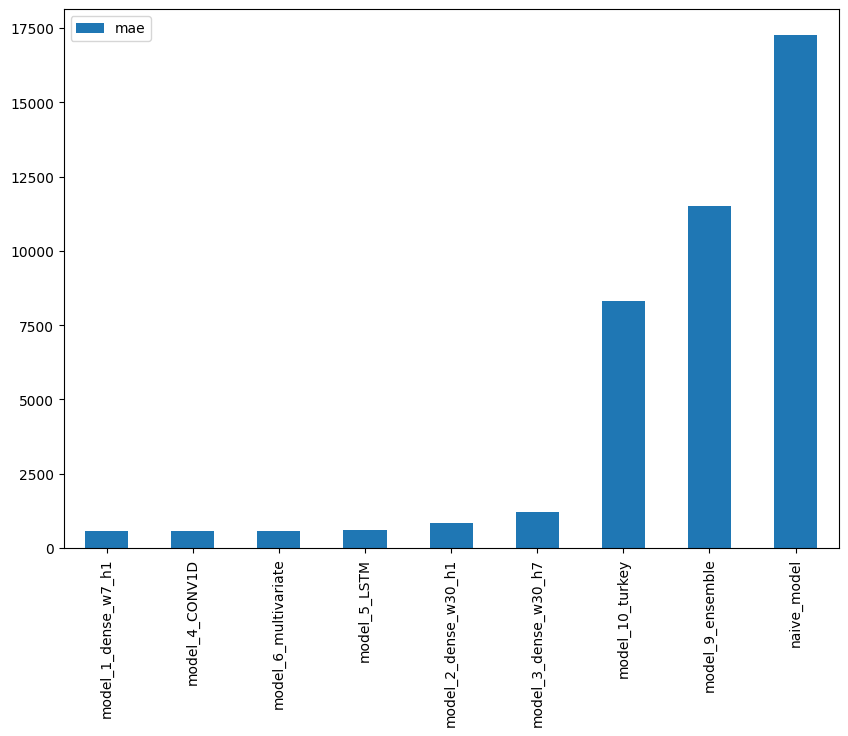

In [246]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");